# Use Case: Electricity Consumption of a single building

**Dataset**: Half-hourly electricity consumption data from January to April 2024 enriched with weather conditions, historical consumptions and anomaly labels.  
[48 intervals in a day]

---

## Research Questions

1. How is the electricity consumption from winter to spring?  
2. Can we deduce if the building is a residential or a non-residential building?  
3. Does the change of electricity consumption is related to the weather (temperature, wind and/or humidity)?

## Why Data Aggregation Matters

In this section, we'll explore how aggregating high-frequency consumption data (half-hourly) to different time scales (hourly, daily, weekly) to reduce noise in the data and answer  questions at the appropriate time scale

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv(r"smart_meter_data.csv")
df

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal
...,...,...,...,...,...,...,...
4995,2024-04-14 01:30:00,0.366839,0.701004,0.362397,0.509174,0.490516,Normal
4996,2024-04-14 02:00:00,0.493568,0.258212,0.677895,0.627889,0.535212,Normal
4997,2024-04-14 02:30:00,0.893818,0.431739,0.688926,0.508038,0.681099,Abnormal
4998,2024-04-14 03:00:00,0.509673,0.592927,0.366151,0.668218,0.710599,Normal


In [3]:
df.dtypes

Timestamp                object
Electricity_Consumed    float64
Temperature             float64
Humidity                float64
Wind_Speed              float64
Avg_Past_Consumption    float64
Anomaly_Label            object
dtype: object

In [4]:
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.dtypes


Timestamp               datetime64[ns]
Electricity_Consumed           float64
Temperature                    float64
Humidity                       float64
Wind_Speed                     float64
Avg_Past_Consumption           float64
Anomaly_Label                   object
dtype: object

## Extract year, month, day and day name 
- Extract: year, month, day (1:30/28/31), day name, day_of_year (1:105) by using dt.year or dt.strftime()  
- Extract: week, day_2, hour by using dt.to_period().apply(lambda r: r.start_time)  

NB: .apply(lambda r: r.start_time) is to have datetime format and not period  (otehrwise mtpl or seaborn cannot plot)

In [6]:
#Methdology 2: dt accessor 

df["Year"]=df["Timestamp"].dt.year
df["Month"]=df["Timestamp"].dt.month
df["Month_name"]=df["Timestamp"].dt.strftime("%B")
df["Day"]=df["Timestamp"].dt.day
df["Day_name"]=df["Timestamp"].dt.day_name()
df["Day_of_year"]=df["Timestamp"].dt.day_of_year 
df['Day_Type'] = df['Timestamp'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df['Week'] = df['Timestamp'].dt.to_period('W').apply(lambda r: r.start_time)
df["Day_2"]=df["Timestamp"].dt.to_period("D").apply(lambda r: r.start_time)
df["Hour"]=df["Timestamp"].dt.to_period("H").apply(lambda r: r.start_time)
df

/var/folders/77/thbhtfx5753f1j0bt0__myth0000gn/T/ipykernel_5583/3314045387.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["Hour"]=df["Timestamp"].dt.to_period("H").apply(lambda r: r.start_time)


,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label,Year,Month,Month_name,Day,Day_name,Day_of_year,Day_Type,Week,Day_2,Hour
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 00:00:00
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 00:00:00
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 01:00:00
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 01:00:00
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-04-14 01:30:00,0.366839,0.701004,0.362397,0.509174,0.490516,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 01:00:00
4996,2024-04-14 02:00:00,0.493568,0.258212,0.677895,0.627889,0.535212,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 02:00:00
4997,2024-04-14 02:30:00,0.893818,0.431739,0.688926,0.508038,0.681099,Abnormal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 02:00:00
4998,2024-04-14 03:00:00,0.509673,0.592927,0.366151,0.668218,0.710599,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 03:00:00


Feature: Electricity_Consumed                |█         | [ 11%]   00:00 -> (00:03 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

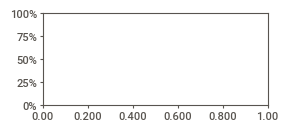

In [10]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html()

In [13]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profiling Report")

ImportError: cannot import name 'Sentinel' from 'typing_extensions' (/opt/anaconda3/envs/WIFI/lib/python3.11/site-packages/typing_extensions.py)

# Plot energy consumption 

1. Plot the electricity consumption at the following intervals: 
- half-hour 
- daily  
NB. When plotting in sns.lineplot set the estimator=None so it show the raw values without averaging. 
Eg. Day: each day has 48 readings. When plotting seaborn average the half-hourly electrcity consumption per day and the variability of the half-hour readings wihtin each day. But we want the raw data not the average.

1. Plot aggregated data at the following intervals: 
- daily
- weekly
- monthly  
NB. for aggregated data sum the electrcity consumption by day_of_year/week/month (daily_demand)

## Plot without aggregation

In [7]:
df

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label,Year,Month,Month_name,Day,Day_name,Day_of_year,Day_Type,Week,Day_2,Hour
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 00:00:00
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 00:00:00
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 01:00:00
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 01:00:00
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-04-14 01:30:00,0.366839,0.701004,0.362397,0.509174,0.490516,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 01:00:00
4996,2024-04-14 02:00:00,0.493568,0.258212,0.677895,0.627889,0.535212,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 02:00:00
4997,2024-04-14 02:30:00,0.893818,0.431739,0.688926,0.508038,0.681099,Abnormal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 02:00:00
4998,2024-04-14 03:00:00,0.509673,0.592927,0.366151,0.668218,0.710599,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 03:00:00


<Figure size 640x480 with 0 Axes>

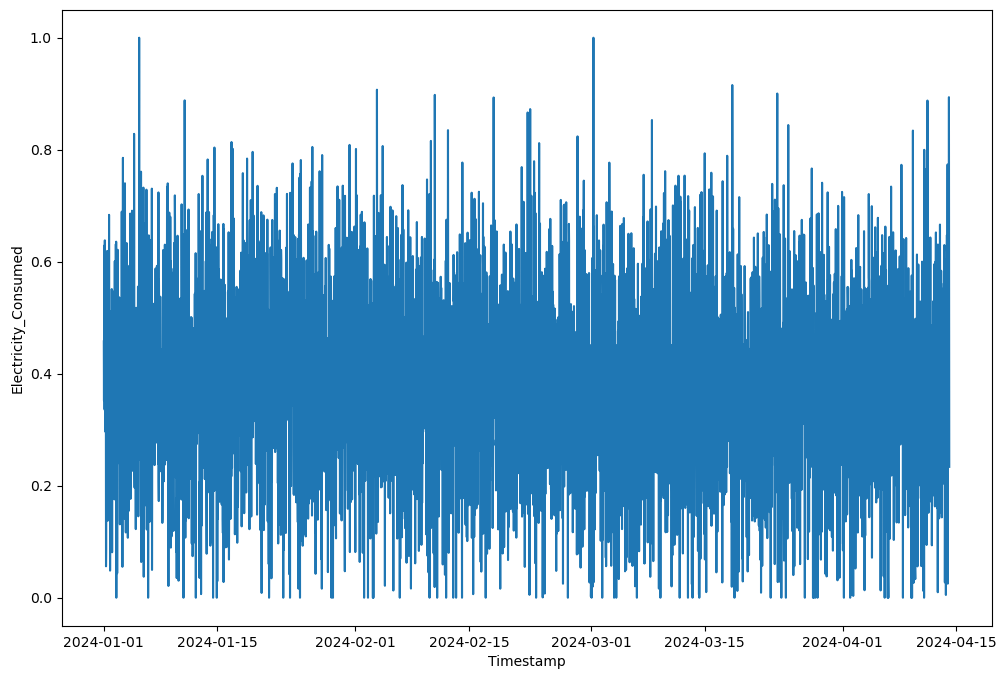

<Figure size 640x480 with 0 Axes>

In [8]:
# half-hour

plt.figure(figsize=(12,8))

sns.lineplot(
    data=df,
    x="Timestamp",
    y="Electricity_Consumed"
)

plt.figure()



In [14]:
df

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label,Year,Month,Month_name,Day,Day_name,Day_of_year,Day_Type,Week,Day_2,Hour
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 00:00:00
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 00:00:00
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 01:00:00
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 01:00:00
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-04-14 01:30:00,0.366839,0.701004,0.362397,0.509174,0.490516,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 01:00:00
4996,2024-04-14 02:00:00,0.493568,0.258212,0.677895,0.627889,0.535212,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 02:00:00
4997,2024-04-14 02:30:00,0.893818,0.431739,0.688926,0.508038,0.681099,Abnormal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 02:00:00
4998,2024-04-14 03:00:00,0.509673,0.592927,0.366151,0.668218,0.710599,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 03:00:00


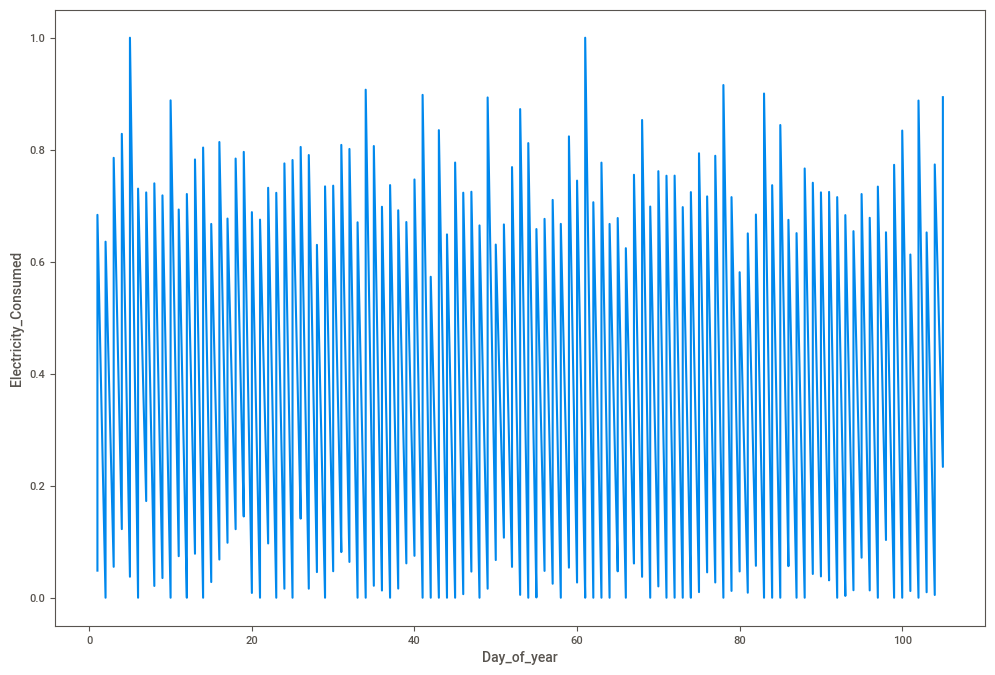

In [25]:
# daily

plt.figure(figsize=(12,8))

sns.lineplot(
    data=df,
    x="Day_of_year",
    y="Electricity_Consumed",
    estimator=None

)

plt.show()

### Some insights:  
The profiles shows ...., 
with fluctutations .... 
BUT ....

## Aggregated Consumptions

In [19]:
df

,Timestamp,Electricity_Consumed,Temperature,Humidity,Wind_Speed,Avg_Past_Consumption,Anomaly_Label,Year,Month,Month_name,Day,Day_name,Day_of_year,Day_Type,Week,Day_2,Hour
0,2024-01-01 00:00:00,0.457786,0.469524,0.396368,0.445441,0.692057,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 00:00:00
1,2024-01-01 00:30:00,0.351956,0.465545,0.451184,0.458729,0.539874,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 00:00:00
2,2024-01-01 01:00:00,0.482948,0.285415,0.408289,0.470360,0.614724,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 01:00:00
3,2024-01-01 01:30:00,0.628838,0.482095,0.512308,0.576241,0.757044,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 01:00:00
4,2024-01-01 02:00:00,0.335974,0.624741,0.672021,0.373004,0.673981,Normal,2024,1,January,1,Monday,1,Weekday,2024-01-01,2024-01-01,2024-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-04-14 01:30:00,0.366839,0.701004,0.362397,0.509174,0.490516,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 01:00:00
4996,2024-04-14 02:00:00,0.493568,0.258212,0.677895,0.627889,0.535212,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 02:00:00
4997,2024-04-14 02:30:00,0.893818,0.431739,0.688926,0.508038,0.681099,Abnormal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 02:00:00
4998,2024-04-14 03:00:00,0.509673,0.592927,0.366151,0.668218,0.710599,Normal,2024,4,April,14,Sunday,105,Weekend,2024-04-08,2024-04-14,2024-04-14 03:00:00


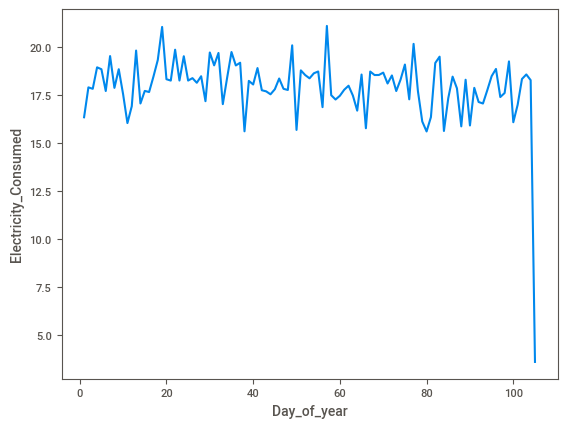

In [26]:
# daily consumption

daily_demand=df.groupby("Day_of_year")["Electricity_Consumed"].sum().reset_index()

sns.lineplot(
    data=daily_demand,
    x="Day_of_year",
    y="Electricity_Consumed"
)

plt.show()

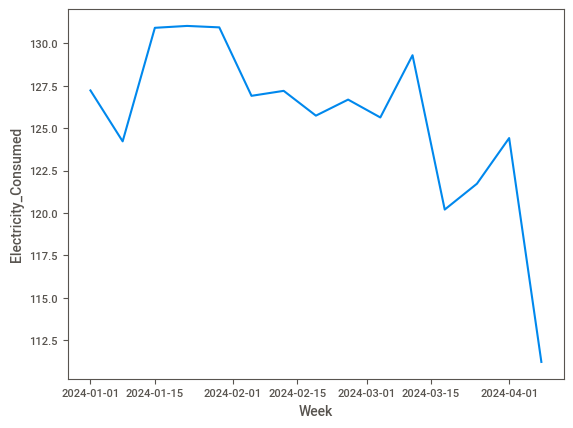

In [31]:
# weekly consumption

weekly_demand = df.groupby("Week")["Electricity_Consumed"].sum().reset_index()

sns.lineplot(
    data=weekly_demand,
    x="Week",
    y="Electricity_Consumed"
)

plt.show()

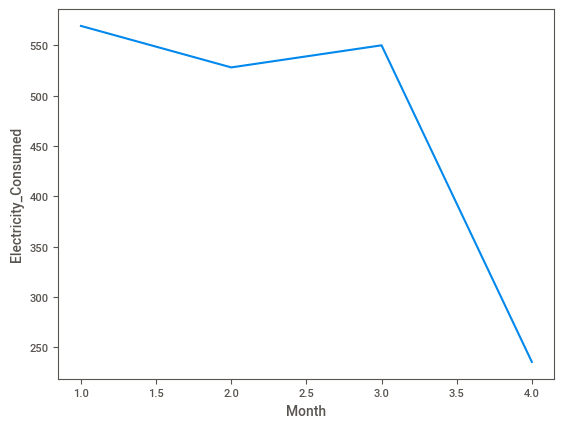

In [32]:
# monthly consumption

monthly_demand = df.groupby("Month")["Electricity_Consumed"].sum().reset_index() 

sns.lineplot(
    data=monthly_demand,
    x="Month",
    y="Electricity_Consumed"
)

plt.show()

### Some insights: 
Looking at the monthly energy consumption (510-600kWh/month) --> possibly is a ........  
[On average, the monthly consumption of a resindetial building - house with 4 people- is 290-425kWh/month] 

- Check the energy consumption the weekend vs weekday 

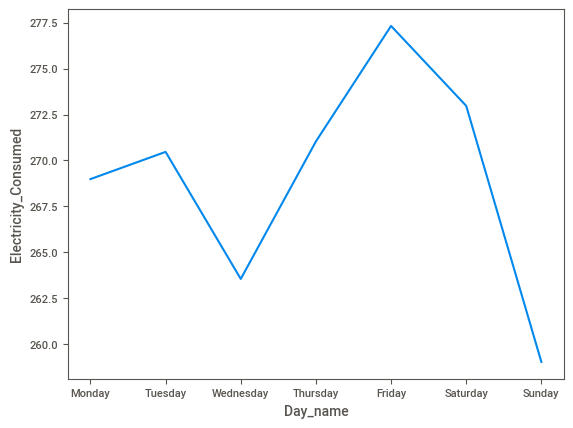

In [33]:
# energy consumption per day name - sum
day_name_demand = df.groupby("Day_name")["Electricity_Consumed"].sum().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name_demand['Day_name'] = pd.Categorical(day_name_demand['Day_name'], categories=day_order, ordered=True)
day_name_demand = day_name_demand.sort_values('Day_name')

sns.lineplot(
    data=day_name_demand,
    x="Day_name",
    y="Electricity_Consumed"
)

plt.show()

In [ ]:
# energy consumption per day name - average
day_name_demand = df.groupby("Day_name")["Electricity_Consumed"].mean().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_name_demand['Day_name'] = pd.Categorical(day_name_demand['Day_name'], categories=day_order, ordered=True)
day_name_demand = day_name_demand.sort_values('Day_name')

